<a href="https://colab.research.google.com/github/DikshantBadawadagi/Show-Forecasting/blob/main/Show-Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy matplotlib seaborn plotly seaborn --quiet

In [2]:
!pip install scikit-learn --upgrade --quiet

In [3]:
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [4]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
os.listdir()

['.config', 'dataset.csv', '.ipynb_checkpoints', 'sample_data']

In [6]:
data_df = pd.read_csv('dataset.csv',low_memory = False)

In [7]:
data_df.tail()

,show_id,timestamp,section_id,availability_standard,availability_resale,capacity,event_date,venue_id,event_time_zone
4132880,4884087,2024_06_05T21_16_43,305,2,0,346,2024-06-06 20:00:00.000 Z,22361,America/New_York
4132881,4884087,2024_06_05T21_16_43,201ADA,4,0,4,2024-06-06 20:00:00.000 Z,22361,America/New_York
4132882,4884087,2024_06_05T21_16_43,307ADA,4,0,4,2024-06-06 20:00:00.000 Z,22361,America/New_York
4132883,4884087,2024_06_06T09_16_10,304,2,0,312,2024-06-06 20:00:00.000 Z,22361,America/New_York
4132884,4884087,2024_06_06T09_16_10,207ADA,1,0,4,2024-06-06 20:00:00.000 Z,22361,America/New_York


In [ ]:
data_df.describe()

,show_id,availability_standard,availability_resale,capacity,venue_id
count,4.132885e+06,4.132885e+06,4.132885e+06,4.132885e+06,4.132885e+06
mean,4.829854e+06,1.566541e+02,1.763831e+01,3.659023e+02,1.049756e+04
std,1.499810e+05,9.115976e+02,2.802916e+02,1.188579e+03,9.242035e+03
min,4.217851e+06,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
25%,4.780388e+06,4.000000e+00,0.000000e+00,8.900000e+01,8.680000e+02
50%,4.861385e+06,2.700000e+01,0.000000e+00,2.090000e+02,1.144500e+04
75%,4.934185e+06,1.180000e+02,9.000000e+00,3.510000e+02,2.185300e+04
max,5.060180e+06,8.670400e+04,7.463200e+04,1.000000e+05,2.908400e+04


In [ ]:
data_df.isna().sum()

,0
show_id,0
timestamp,0
section_id,0
availability_standard,0
availability_resale,0
capacity,0
event_date,0
venue_id,0
event_time_zone,0


In [ ]:
data_df.duplicated().sum()

0

In [8]:
data_df['Date'] = pd.to_datetime(data_df.event_date)

In [ ]:
data_df.Date.min(),data_df.Date.max()

(Timestamp('2024-05-01 18:00:00+0000', tz='UTC'),
 Timestamp('2099-12-07 20:00:00+0000', tz='UTC'))

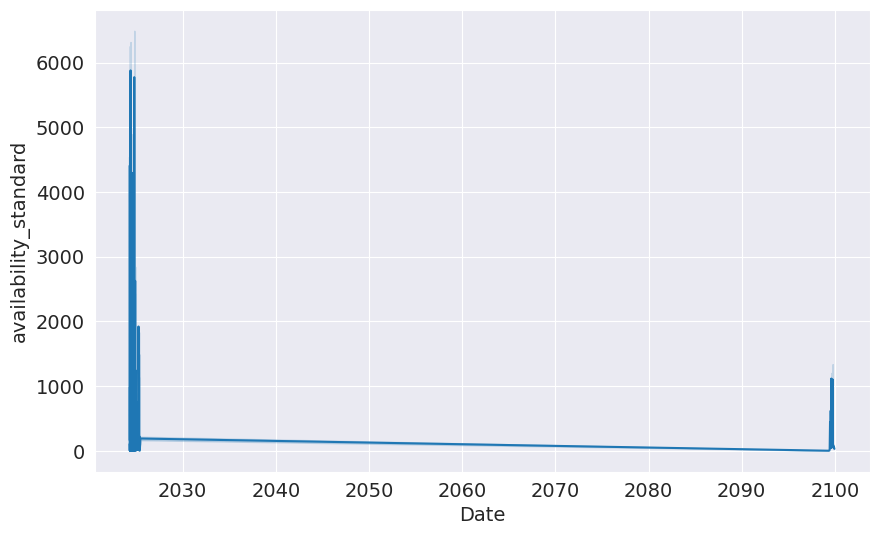

In [ ]:
sns.lineplot(data=data_df, x='Date', y='availability_standard')
plt.show()


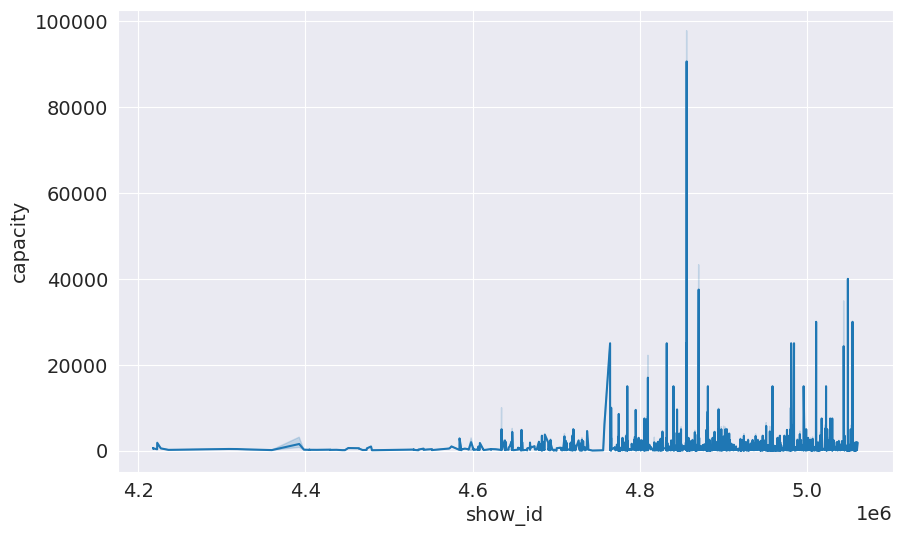

In [ ]:
sns.lineplot(data=data_df,x='show_id',y='capacity')
plt.show()

<Axes: xlabel='Day', ylabel='availability_standard'>

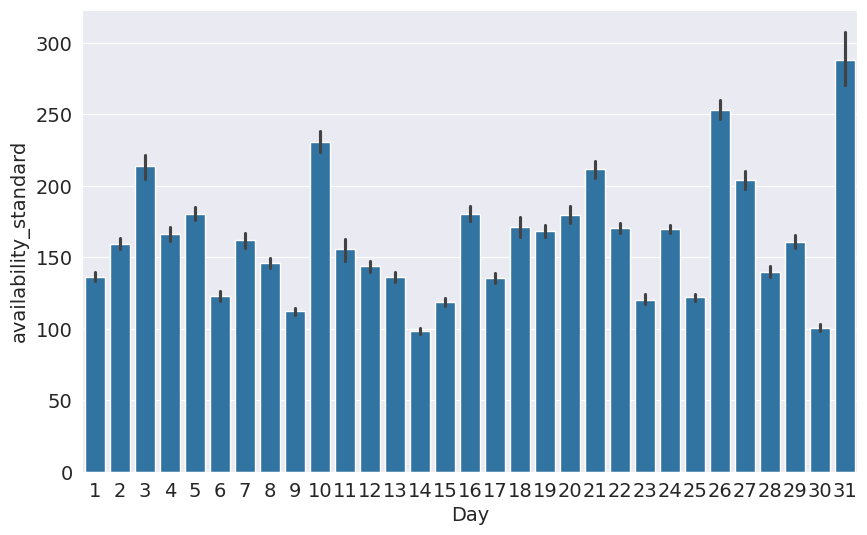

In [ ]:
sns.barplot(data=data_df,x='Day',y='availability_standard')

<Axes: xlabel='Year', ylabel='availability_standard'>

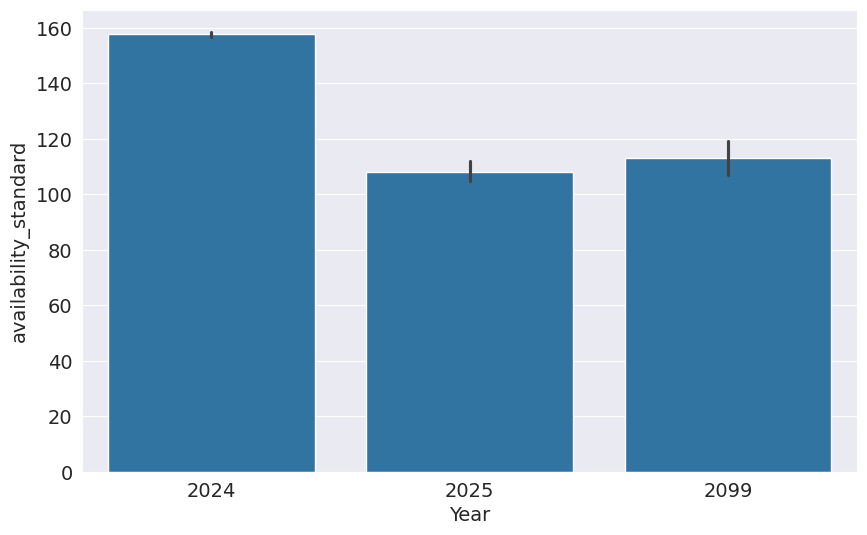

In [ ]:
sns.barplot(data=data_df,x='Year',y='availability_standard')

In [10]:
data_df['Year'].unique()

array([2024, 2025, 2099], dtype=int32)

In [9]:
data_df['Year'] = data_df['Date'].dt.year
data_df['Month'] = data_df['Date'].dt.month
data_df['Day'] = data_df['Date'].dt.day



3

<ipython-input-18-5e1a98b7f7bd>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-18-5e1a98b7f7bd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['availability_standard'])


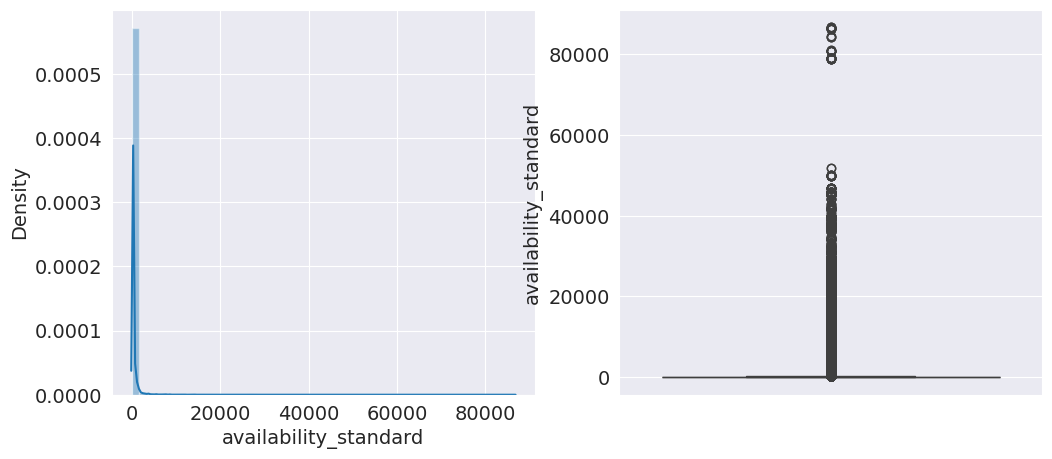

In [ ]:
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(data_df['availability_standard'])

plt.subplot(1, 2, 2)
sns.boxplot(data_df['availability_standard'])
plt.show()

In [11]:
y24_df = data_df[data_df['Year'] == 2024]
y25_df = data_df[data_df['Year'] == 2025]
y99_df = data_df[data_df['Year'] == 2099]

In [19]:
y24_df.to_csv('y24_df.csv')
y25_df.to_csv('y25_df.csv')
y99_df.to_csv('y99_df.csv')

In [17]:
rows = y99_df.shape[0]
rows

56805

<ipython-input-22-c49dd2bcd499>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-22-c49dd2bcd499>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y24_df['availability_standard'])


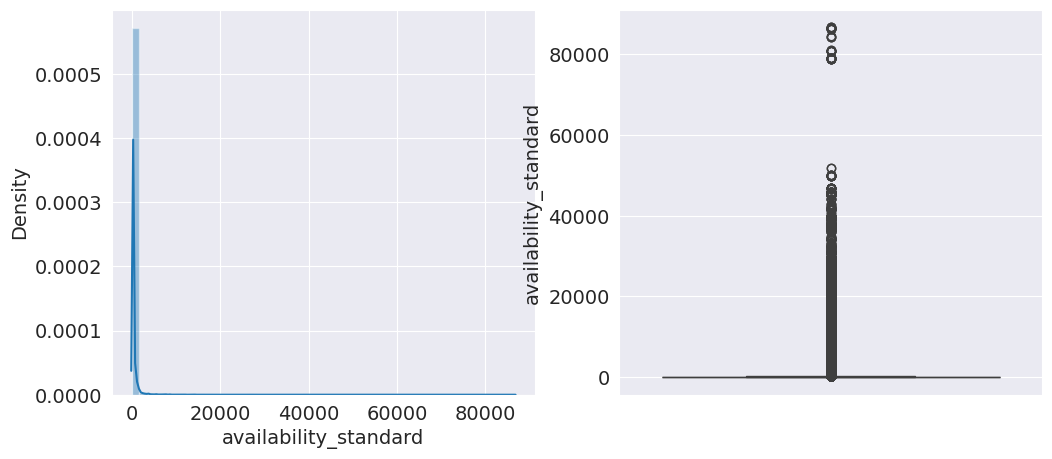

In [ ]:
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(y24_df['availability_standard'])

plt.subplot(1, 2, 2)
sns.boxplot(y24_df['availability_standard'])
plt.show()

<Axes: xlabel='Month', ylabel='availability_standard'>

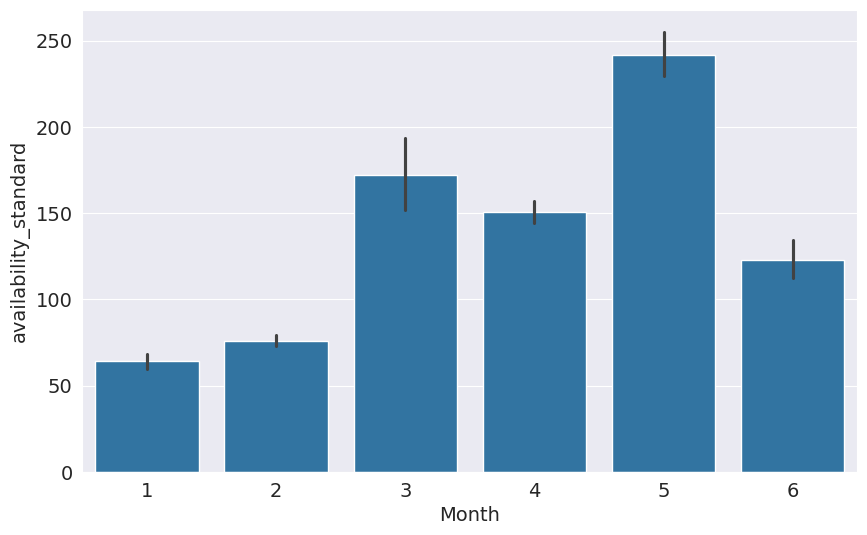

In [18]:
sns.barplot(data=y25_df,x='Month',y='availability_standard')

<Axes: xlabel='Day', ylabel='availability_standard'>

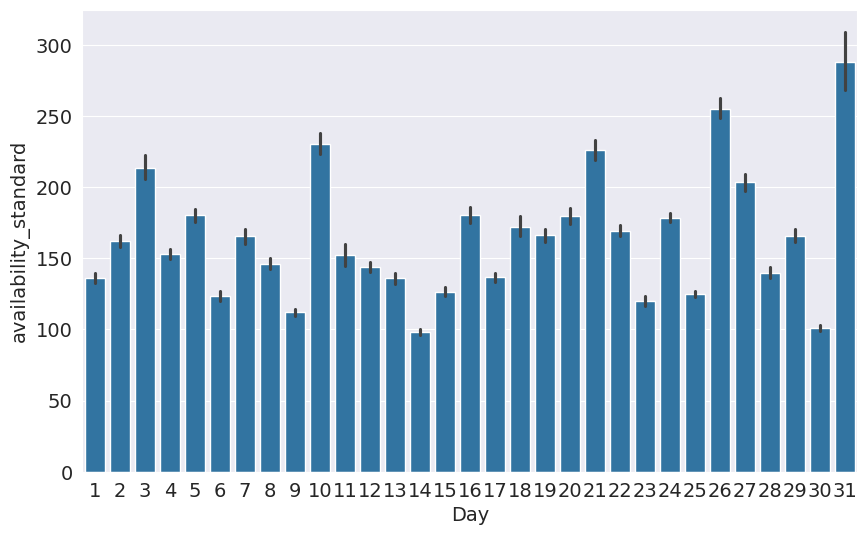

In [ ]:
sns.barplot(data=y24_df,x='Day',y='availability_standard')

<Axes: xlabel='event_time_zone', ylabel='availability_standard'>

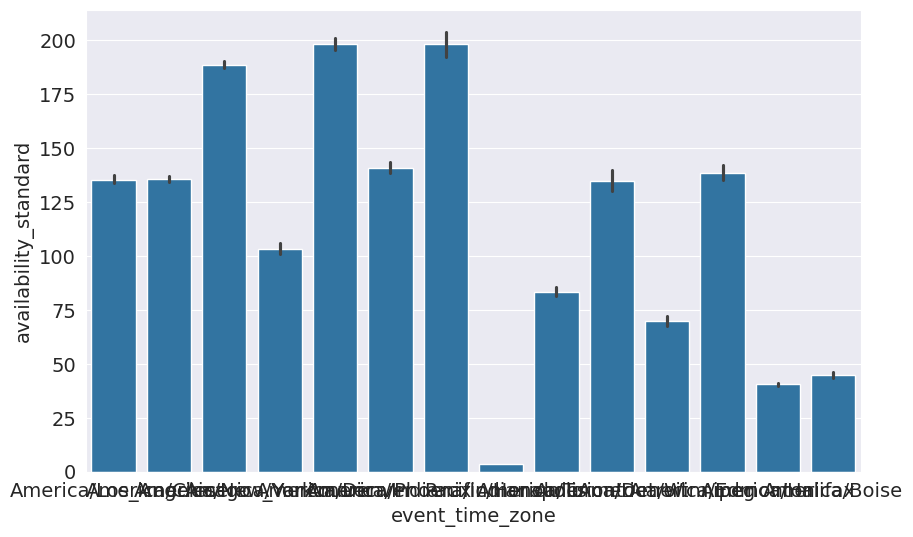

In [ ]:
sns.barplot(data=y24_df,x='event_time_zone',y='availability_standard')

In [ ]:
sns.histplot(data=y24_df,x='section_id',y='availability_standard')

In [ ]:
sns.barplot(x='venue_id', y='Value', hue='Measure', data=df_melted)